In [2]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, adadelta, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

In [4]:
PATH = os.getcwd()
data_path = './dataset'
data_Dir_list = os.listdir(data_path)
print(data_Dir_list)
img_row = 64
img_col = 64
num_channel = 3
epoch = 50
num_classes = 10

['Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Early_blight']


In [3]:
img_data_list = []
images = []
i = 0

In [4]:
for dataset in data_Dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    for img in img_list:
        i = i + 1
        ip_img = cv2.imread(data_path + '/' + dataset + '/' + img)
        #ip_img = cv2.cvtColor(ip_img, cv2.COLOR_BGR2GRAY)
        ip_img = cv2.resize(ip_img, (img_row, img_col))
        img_data_list.append(ip_img)
    images.append(i)

In [5]:
print(images)

[1404, 3080, 4671, 10028, 10401, 12528, 13480, 15251, 17160, 18160]


In [27]:
img_data = np.array(img_data_list)

In [28]:
img_data = img_data / 255.0

In [29]:
img_data.shape

(18160, 64, 64, 3)

In [25]:
img_data = np.expand_dims(img_data, axis=3)

In [30]:
img_data.shape

(18160, 64, 64, 3)

In [11]:
n_samples = img_data.shape[0]
labels = np.ones((n_samples,), dtype='int64')

In [12]:
labels[:images[0]] = data_Dir_list.index(data_Dir_list[0])
label_dictionary = {}
label_dictionary[0] = data_Dir_list[0]

In [13]:
count = 0
for class_name in data_Dir_list:
    if count == 0:
        count += 1
        continue
    else:
        labels[images[count - 1]:images[count]
               ] = data_Dir_list.index(class_name)
        label_dictionary[count] = class_name
        count += 1

In [14]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [15]:
label_dictionary

{0: 'Tomato___Target_Spot',
 1: 'Tomato___Spider_mites Two-spotted_spider_mite',
 2: 'Tomato___healthy',
 3: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 4: 'Tomato___Tomato_mosaic_virus',
 5: 'Tomato___Bacterial_spot',
 6: 'Tomato___Leaf_Mold',
 7: 'Tomato___Septoria_leaf_spot',
 8: 'Tomato___Late_blight',
 9: 'Tomato___Early_blight'}

In [16]:
Y = to_categorical(labels, num_classes)

In [17]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
# Shuffle data
from sklearn.utils import shuffle
x, y = shuffle(img_data, Y, random_state=2)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.20, random_state=2)

In [33]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    shear_range=0.2,
    zoom_range=0.2,
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=15,
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.2,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.2,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

In [34]:
datagen.fit(X_train)

In [40]:
tf.reset_default_graph()
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(3, 3),
                 activation='relu', input_shape=(img_row, img_col, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(312, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
__________

In [41]:
augmented_checkpoint = ModelCheckpoint('augmented_best_model.hdf5',  # model filename
                                       monitor='val_loss',  # quantity to monitor
                                       verbose=1,  # verbosity - 0 or 1
                                       save_best_only=True,  # The latest best model will not be overwritten
                                       mode='auto')  # The decision to overwrite model is made
# automatically depending on the quantity to monitor

In [42]:
model.compile(loss=keras.losses.categorical_crossentropy,  # Better loss function for neural networks
              optimizer=keras.optimizers.Adam(),  # Adam optimizer with 1.0e-4 learning rate
              metrics=['accuracy'])  # Metrics to be evaluated by the model


In [43]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),  # number of samples per gradient update
                           epochs=epoch,  # number of iterations
                           validation_data=(X_test, Y_test),
                           callbacks=[augmented_checkpoint],
                           verbose=1,
                           shuffle=True)

Epoch 1/50
114/114 [==============================] - 47s 415ms/step - loss: 1.9459 - acc: 0.3335 - val_loss: 1.7559 - val_acc: 0.3736

Epoch 00001: val_loss improved from inf to 1.75593, saving model to augmented_best_model.hdf5
Epoch 2/50
114/114 [==============================] - 14s 123ms/step - loss: 1.6712 - acc: 0.4205 - val_loss: 1.3764 - val_acc: 0.5162

Epoch 00002: val_loss improved from 1.75593 to 1.37644, saving model to augmented_best_model.hdf5
Epoch 3/50
114/114 [==============================] - 14s 123ms/step - loss: 1.4550 - acc: 0.4911 - val_loss: 1.2455 - val_acc: 0.5504

Epoch 00003: val_loss improved from 1.37644 to 1.24545, saving model to augmented_best_model.hdf5
Epoch 4/50
114/114 [==============================] - 14s 125ms/step - loss: 1.3513 - acc: 0.5263 - val_loss: 1.1399 - val_acc: 0.5787

Epoch 00004: val_loss improved from 1.24545 to 1.13995, saving model to augmented_best_model.hdf5
Epoch 5/50
114/114 [==============================] - 14s 125ms/step

In [45]:
import pickle

with open('./model/history', 'wb') as file_pi:
    pickle.dump(hist.history, file_pi)

model.save('./model/model.hdf5')

In [48]:
H = hist

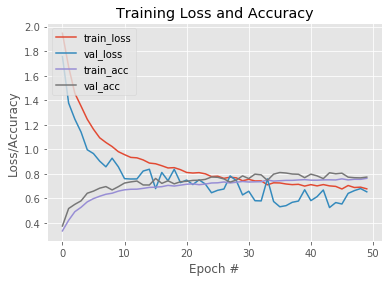

In [50]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = 50
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plant_disease.png")

In [7]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
#import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(3, 3),
                 activation='relu', input_shape=(img_row, img_col, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(312, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
__________

In [13]:
image_path = "sample.jpg"
#model_path = "plant_disease.model"
#binarizer_path = "plant_disease.pickle"

# load the image
image = cv2.imread(image_path)
output = image.copy()
 
# pre-process the image for classification
image = cv2.resize(image, (64, 64))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# load the trained convolutional neural network and the label
# binarizer
print("[INFO] loading network...")
#model = load_model(model_path)
lb = pickle.load(open('augmented_best_model.hdf5', "rb"))

# classify the input image
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
cv2.putText(output, str(np.max(proba)), (10, 55),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (255, 0, 0), 2)


# show the output image
print("[INFO] class followed by probability...")
plt.imshow(output)

[INFO] loading network...


UnpicklingError: invalid load key, 'H'.